In [2]:
# MCMC stands for “Markov chain Monte Carlo". bution. Unlike
# grid methods, MCMC methods don’t try to compute the posterior distribution; they
# sample from it instead.
#
# The method, according to my own understanding, is to create a model of stocastic process,
# whose input is a multidimensional point sampled from the prior distribution, and after this process
# the output is a multidimensional point sampled from teh posterior distribution.
#
# References:
#
# From this article (https://towardsdatascience.com/monte-carlo-markov-chain-mcmc-explained-94e3a6c8de11)
# I realized MCMC is foundamentally a sampling method.
#
# This article (https://mlg.eng.cam.ac.uk/pub/pdf/SciGhaGor15.pdf) demonstrated the idea of
# Metropolis-Hasting (MH) algorithm and how to interpret MCMC using the language of monad.

In [3]:
# How is it done? First, the markov chain part is the key. The goal of the algorithms is to
# construct a markov chain whose stocastic matrix P is the equilibrium. The Metropolis-Hasting (MH)
# algorithm is about finding the equilibrium.
#
# The full mh algorithm is described as follows.
# Input: a prior distribution (Dist a) and a conditional distribution (a -> Prob, similar to the likelihood)
# Output: a iterated sequence of distributions that asymptotically approximate the posterior distribution.
#
# For each iteration, sample from the prior distribution (A, r) where A is the sampled value and
# r the corresponding likelihood. Let (A', r') be the sampled value and likelihood from previous iteration.
#
# if r > r', "accept", let (A', r') = (A, r)
# if r < r', "accept" with a probability of r/r', or "reject", let (A', r') = (A', r')
#
# state (A, r) will approach the desired posterior and r/r' will approach 1.
#
# The intuition and derivation can be found on https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm.

In [9]:
# This book merely talks about how to use the PyMC3 for this. Let me go through the examples from the book.
#!pip install -r requirements.txt
# I just added pymc3 to the dependencies

In [14]:
# import pymc3 as pm
# with pm.Model() as model:
#    lam = pm.Gamma('lam', alpha=1.4, beta=1.0)
#    goals = pm.Poisson('goals', lam)
# with model:
#    trace = pm.sample_prior_predictive(1000)

In [19]:
# Installing and running pymc3 is a pain in the ass. It even tries to compile c code.
# It's probably for hardware acceleration but I just want to play with it a bit. So I decide to
# just write a crude version myself. The core idea is simple enough to be implemented
# in a few lines of code.

In [21]:
%load_ext autoreload
# so I can change mcmc.py without reloading manually
%autoreload 3
from mcmc import MCMC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: >

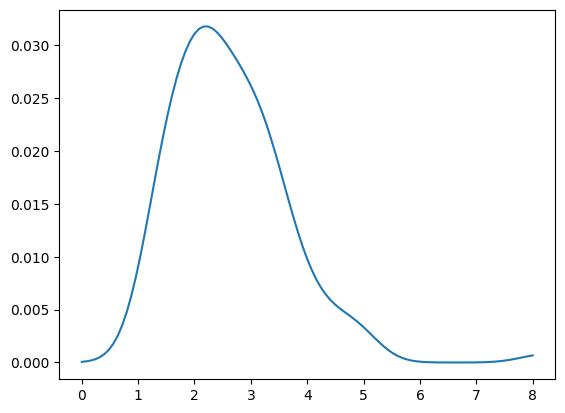

In [62]:
from scipy.stats import gamma, poisson

def goal_problem(data):
    prior_sampler = (lambda : gamma(1.4, 1.0).rvs(1)[0])
    likelihood = (lambda lam: poisson(lam).pmf(data))
    model = MCMC(prior_sampler, likelihood)
    qs = np.linspace(0, 8, 101)
    posterior_pmf = model.posterior_pmf_kde(100, 10, qs)
    return posterior_pmf

goal_problem(4).plot()